<a href="https://colab.research.google.com/github/vivek-varshney/Bank_Marketing_DataSet/blob/main/Bank_Marketing_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#Description

In [ ]:
derc = open('/content/drive/MyDrive/data/bank-additional/bank-additional-names.txt',mode='r')
print(derc.read())

Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/bank-additional/bank-additional-full.csv',sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe

<bound method NDFrame.describe of        age          job  marital  ... euribor3m nr.employed    y
0       56    housemaid  married  ...     4.857      5191.0   no
1       57     services  married  ...     4.857      5191.0   no
2       37     services  married  ...     4.857      5191.0   no
3       40       admin.  married  ...     4.857      5191.0   no
4       56     services  married  ...     4.857      5191.0   no
...    ...          ...      ...  ...       ...         ...  ...
41183   73      retired  married  ...     1.028      4963.6  yes
41184   46  blue-collar  married  ...     1.028      4963.6   no
41185   56      retired  married  ...     1.028      4963.6   no
41186   44   technician  married  ...     1.028      4963.6  yes
41187   74      retired  married  ...     1.028      4963.6   no

[41188 rows x 21 columns]>

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df = df.drop([24091,4107])

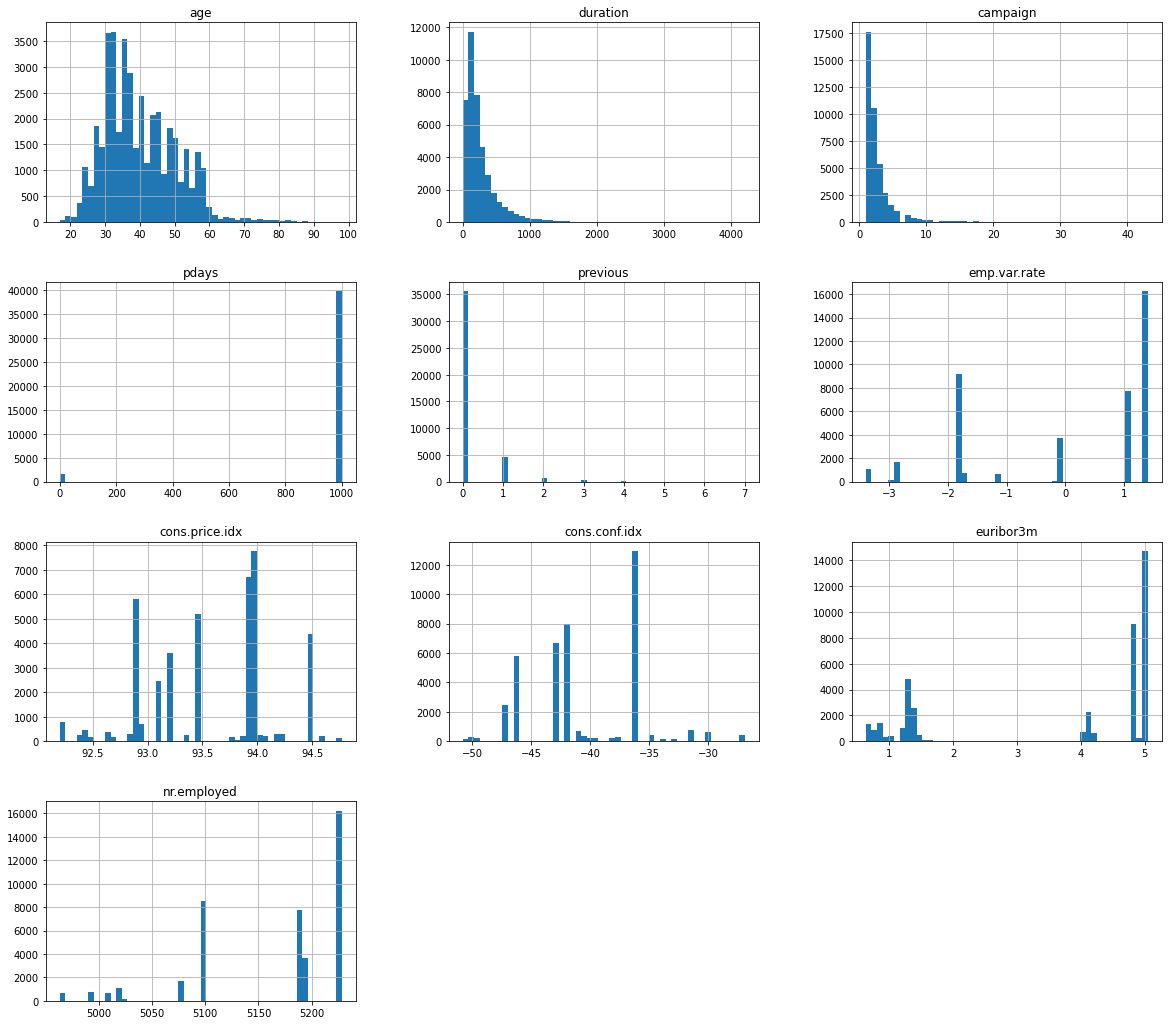

In [ ]:
df.hist(bins= 50,figsize=(20,18));

In [ ]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1].values

In [ ]:
X = pd.get_dummies(data = X, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'],drop_first = True)
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 9.27915613e-02, -8.52985909e-01, -5.67734173e-01, ...,
         2.01735050e+00,  3.98132066e-01, -1.84179910e-01],
       [-7.67691512e-01, -3.17816452e-01, -5.67734173e-01, ...,
        -4.95699682e-01,  3.98132066e-01, -1.84179910e-01],
       [ 1.62253925e+00, -6.66840011e-01, -5.67734173e-01, ...,
        -4.95699682e-01,  3.98132066e-01, -1.84179910e-01],
       ...,
       [-3.85254591e-01, -7.44400802e-01, -5.67734173e-01, ...,
        -4.95699682e-01,  3.98132066e-01, -1.84179910e-01],
       [-2.81766914e-03,  1.43670254e-01, -2.06829185e-01, ...,
         2.01735050e+00,  3.98132066e-01, -1.84179910e-01],
       [ 2.84010022e-01,  3.69983252e+00, -5.67734173e-01, ...,
        -4.95699682e-01,  3.98132066e-01, -1.84179910e-01]])

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_train = classifier.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred_train,y_train)
print(cm)
accuracy_score(y_pred_train,y_train)

[[28467  2135]
 [  783  1563]]


0.9114362025009105

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_pred,y_test)

[[7101  532]
 [ 195  410]]


0.911750424860403

In [ ]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
corr_matrix = df.corr().round(2)
corr_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.00,-0.00,0.00,-0.03,0.02,-0.00,0.00,0.13,0.01,-0.02
duration,-0.00,1.00,-0.07,-0.05,0.02,-0.03,0.01,-0.01,-0.03,-0.05
campaign,0.00,-0.07,1.00,0.05,-0.08,0.15,0.13,-0.01,0.14,0.14
pdays,-0.03,-0.05,0.05,1.00,-0.59,0.27,0.08,-0.09,0.30,0.37
previous,0.02,0.02,-0.08,-0.59,1.00,-0.42,-0.20,-0.05,-0.45,-0.50
emp.var.rate,-0.00,-0.03,0.15,0.27,-0.42,1.00,0.78,0.20,0.97,0.91
cons.price.idx,0.00,0.01,0.13,0.08,-0.20,0.78,1.00,0.06,0.69,0.52
cons.conf.idx,0.13,-0.01,-0.01,-0.09,-0.05,0.20,0.06,1.00,0.28,0.10
euribor3m,0.01,-0.03,0.14,0.30,-0.45,0.97,0.69,0.28,1.00,0.95
nr.employed,-0.02,-0.05,0.14,0.37,-0.50,0.91,0.52,0.10,0.95,1.00


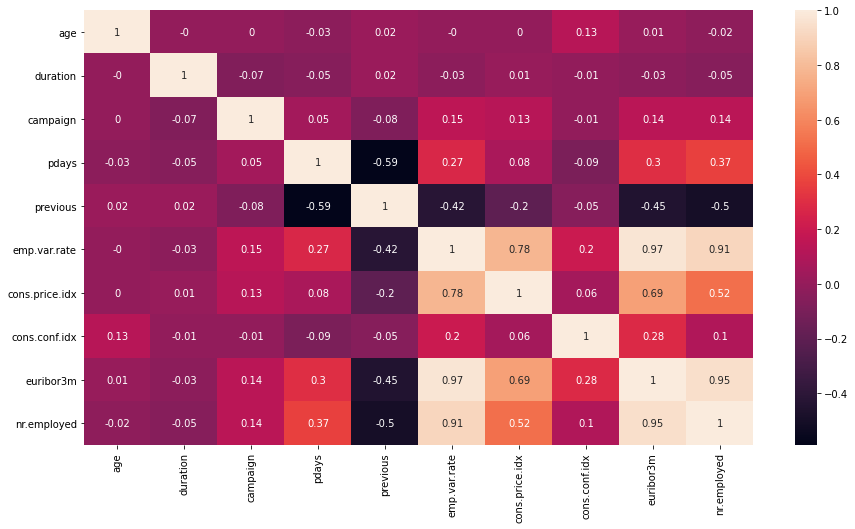

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True);

#Data Preprocessing

In [ ]:
y = pd.read_csv('/content/drive/MyDrive/data/bank-additional/bank-additional.csv',sep=';')
y

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [ ]:
X_train = df.iloc[:,:-1]
X_test = y.iloc[:,:-1]
y_train = df.iloc[:,-1].values
y_test =  y.iloc[:,-1].values

In [ ]:
X_train = pd.get_dummies(data = X_train, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'],drop_first = True).values
X_test = pd.get_dummies(data = X_test, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'],drop_first = True).values

In [ ]:
X_train

array([[ 56., 261.,   1., ...,   0.,   1.,   0.],
       [ 57., 149.,   1., ...,   0.,   1.,   0.],
       [ 37., 226.,   1., ...,   0.,   1.,   0.],
       ...,
       [ 56., 189.,   2., ...,   0.,   1.,   0.],
       [ 44., 442.,   1., ...,   0.,   1.,   0.],
       [ 74., 239.,   3., ...,   0.,   0.,   0.]])

In [ ]:
X_test

array([[ 30., 487.,   2., ...,   0.,   1.,   0.],
       [ 39., 346.,   4., ...,   0.,   1.,   0.],
       [ 25., 227.,   1., ...,   1.,   1.,   0.],
       ...,
       [ 27.,  64.,   2., ...,   0.,   0.,   0.],
       [ 58., 528.,   1., ...,   0.,   1.,   0.],
       [ 34., 175.,   1., ...,   1.,   1.,   0.]])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 1.5329815 ,  0.0109508 , -0.56802754, ..., -0.49608171,
         0.39771712, -0.18570467],
       [ 1.62893933, -0.42271443, -0.56802754, ..., -0.49608171,
         0.39771712, -0.18570467],
       [-0.29021735, -0.12456958, -0.56802754, ..., -0.49608171,
         0.39771712, -0.18570467],
       ...,
       [ 1.5329815 , -0.26783399, -0.20537958, ..., -0.49608171,
         0.39771712, -0.18570467],
       [ 0.38148749,  0.71178478, -0.56802754, ..., -0.49608171,
         0.39771712, -0.18570467],
       [ 3.2602225 , -0.07423344,  0.15726837, ..., -0.49608171,
        -2.51434993, -0.18570467]])

In [ ]:
X_test

array([[-0.96192218,  0.88602527, -0.20537958, ..., -0.49608171,
         0.39771712, -0.18570467],
       [-0.09830168,  0.34007173,  0.51991633, ..., -0.49608171,
         0.39771712, -0.18570467],
       [-1.44171135, -0.12069757, -0.56802754, ...,  2.01579697,
         0.39771712, -0.18570467],
       ...,
       [-1.24979568, -0.75183536, -0.20537958, ..., -0.49608171,
        -2.51434993, -0.18570467],
       [ 1.72489716,  1.04477772, -0.56802754, ..., -0.49608171,
         0.39771712, -0.18570467],
       [-0.57809085, -0.32204214, -0.56802754, ...,  2.01579697,
         0.39771712, -0.18570467]])

#Model Taining

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
pipeline_LC  = Pipeline([('LogisticReg',LogisticRegression(random_state = 10,n_jobs=-1))])
pipeline_DTC = Pipeline([('DTC',DecisionTreeClassifier(criterion = 'entropy', random_state = 10))])
pipeline_RFC = Pipeline([('RFC',RandomForestClassifier(random_state = 10,n_jobs=-1))])
pipeline_SVC = Pipeline([('SVM',SVC(kernel='linear'))])
pipeline_KNC = Pipeline([('KNN',KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2,n_jobs=-1))])
pipeline_NBC = Pipeline([('GNB',GaussianNB())])
pipeline_ADB = Pipeline([('ADBoost',AdaBoostClassifier())])
pipeline_XGB = Pipeline([('XGBoost',XGBClassifier())])

In [ ]:
pipeline = [pipeline_LC,pipeline_DTC,pipeline_RFC,pipeline_SVC,pipeline_KNC,pipeline_NBC,pipeline_ADB,pipeline_XGB]

for i in pipeline:
  i.fit(X_train,y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
def accu_scores(reg, independent, dependent):
  accuracies  = cross_val_score(reg, independent, dependent,cv = 6, n_jobs=-1)
  print("Scores:", accuracies)
  print("Kfold Accuracy: {:.2f} %".format(accuracies.mean()*100))
  print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
full_pipeline_str = ['Logistic Regression','Dession Tree','Random Forest','SVM','KNN','Navie Bayse','ADa Boost','XGBoost']

from sklearn.metrics import confusion_matrix, accuracy_score
for i,j in zip(pipeline,full_pipeline_str):
  y_pred = i.predict(X_test)
  print(j,':-')
  accu_scores(i,X_train,y_train)
  #cm = confusion_matrix(y_test, y_pred)
  #print(cm)
  print("Accuracy: {:.4f} %".format(accuracy_score(y_test, y_pred)*100))
  print("\n\n")

Logistic Regression :-
Scores: [0.89555717 0.84515659 0.85897436 0.88738345 0.58100233 0.58420746]
Kfold Accuracy: 77.54 %
Standard Deviation: 13.73 %
Accuracy: 91.3571 %



Dession Tree :-
Scores: [0.88943918 0.25651857 0.65632284 0.06745338 0.13388695 0.11494755]
Kfold Accuracy: 35.31 %
Standard Deviation: 30.96 %
Accuracy: 100.0000 %



Random Forest :-
Scores: [0.88725419 0.27297888 0.63141026 0.19274476 0.22421329 0.11494755]
Kfold Accuracy: 38.73 %
Standard Deviation: 27.73 %
Accuracy: 100.0000 %



SVM :-
Scores: [0.88725419 0.37217771 0.72537879 0.77447552 0.56920163 0.58362471]
Kfold Accuracy: 65.20 %
Standard Deviation: 16.61 %
Accuracy: 92.8866 %



KNN :-


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Scores: [0.88725419 0.65972323 0.65690559 0.6662296  0.75131119 0.62951632]
Kfold Accuracy: 70.85 %
Standard Deviation: 8.84 %
Accuracy: 92.3768 %



Navie Bayse :-
Scores: [0.88361253 0.3396941  0.13709207 0.63213869 0.15311772 0.50874126]
Kfold Accuracy: 44.24 %
Standard Deviation: 26.54 %
Accuracy: 74.2899 %



ADa Boost :-
Scores: [0.88725419 0.81471231 0.80827506 0.82342657 0.55944056 0.11494755]
Kfold Accuracy: 66.80 %
Standard Deviation: 26.80 %
Accuracy: 91.6727 %



XGBoost :-
Scores: [0.88725419 0.73153678 0.79472611 0.80638112 0.46066434 0.11494755]
Kfold Accuracy: 63.26 %
Standard Deviation: 26.73 %
Accuracy: 92.4011 %



